<a href="https://colab.research.google.com/github/shqtbz143/202135992/blob/main/%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import pandas as pd

iris=pd.read_csv("https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:

print(pd.unique(iris['Species']))

['setosa' 'versicolor' 'virginica']


In [ ]:
iris_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy() #2차원배열로
iris_target = iris['Species'].to_numpy()
print(iris_input[:5])
print(iris_target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


In [ ]:

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target,stratify=iris_target, random_state=42)

print(train_input.shape)
print(test_input.shape)

(112, 4)
(38, 4)


In [ ]:


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


In [ ]:
train_score = []
test_score = []

for n_neighbors in range (2,50):
    kn = KNeighborsClassifier(n_neighbors=n_neighbors)
    kn.fit(train_scaled, train_target)
    train_score.append(kn.score(train_scaled, train_target))
    test_score.append(kn.score(test_scaled, test_target))

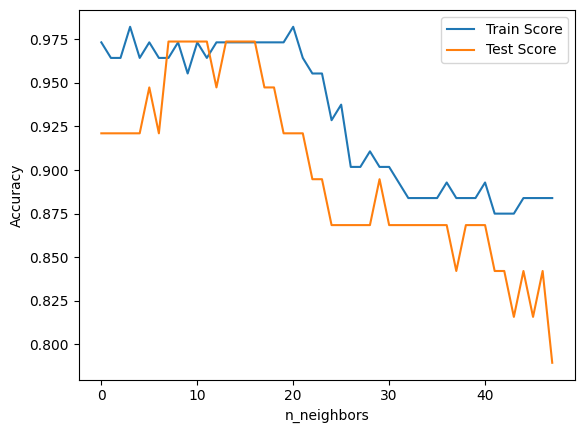

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='Train Score')
plt.plot(test_score, label='Test Score')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9821428571428571
0.9210526315789473


In [ ]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[1.  0.  0. ]
 [0.  0.6 0.4]
 [0.  1.  0. ]
 [0.  1.  0. ]
 [1.  0.  0. ]]


In [ ]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [ ]:


from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9821428571428571
0.9473684210526315


In [ ]:
print(lr.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]
['setosa' 'versicolor' 'virginica']


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ 14.49   7.22 -21.71]
 [ -2.88   2.82   0.06]
 [ -1.46   3.99  -2.52]
 [ -3.4    4.44  -1.04]
 [ 13.45   7.44 -20.9 ]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))

[[0.999 0.001 0.   ]
 [0.003 0.938 0.059]
 [0.004 0.994 0.001]
 [0.    0.995 0.004]
 [0.998 0.002 0.   ]]


In [ ]:
#SGDClassifier
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8392857142857143
0.7631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.predict(test_scaled[:5]))

0.9285714285714286
0.8421052631578947
['setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


In [ ]:
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


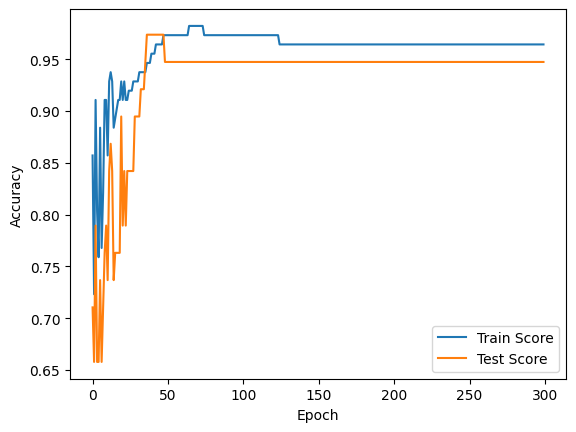

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score, label='Train Score')
plt.plot(test_score, label='Test Score')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#print(max(train_score))
print(np.argmax(train_score))

64


In [ ]:
sc = SGDClassifier(loss='log', max_iter=64, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
